# Analysis for `d1` dataset : small amp , small aspect-ratio

The dataset we are looking at corresponds to the following ligament ensemle - 
- Initial perturbation strength : $\varepsilon = 0.038$
- Aspect-ratio, defined with respect to initial ligament width : $\Lambda = 50$

## Import libraries

We start by loading the required libraries, and set the plotting styles. 

In [6]:
from IPython.core.interactiveshell import InteractiveShell

# pretty print all cell's output and not just the last one
InteractiveShell.ast_node_interactivity = "all"

# Required libraries for data arrays, data manipulation, plotting etc
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_context("poster")
sns.set_style("ticks")
sns.set(rc={'figure.figsize': (16, 9.)})

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}",r'\boldmath']

#sns.set(style="white", palette="muted")
#sns.set_context("paper")


## Data import 

We import a cleaned dataset corresponding to ligament ensemble `d1`. 

### Main dataset

In [7]:
data = pd.read_csv("./data/new/data_d1.csv")
data.head(12).transpose()
print("\n")
print("Total number of datapoints over all slices of time is {}".format(data.shape[0]))

,0,1,2,3,4,5,6,7,8,9,10,11
time,0,2,4,6,8,10,12,14,14,14,14,14
diameter,8.45703,8.56569,8.54792,8.52951,8.51115,8.49804,8.48665,5.68583,3.74608,1.20944,3.89031,1.05721
velocity,NaN,-0.0001775,-0.00027776,-7.70353e-0,-0.00037202,0.00091614,0.00038741,0.019325,0.12211,0.11330,-0.097649,-0.60971




Total number of datapoints over all slices of time is 559992


### Drop count
We also have the total drop count as a function of time. 

In [8]:
ndrops = pd.read_csv("./data/new/ndrops_d1.csv")
ndrops.head(16).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
time,0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30
drops,5191,5189,5187,5180,5177,5381,17170,57694,74115,65775,59291,56154,52540,50109,48616,46756


## Simulation visualization 
This is an example of the images generated from the simulation of an individual ligament, for different points in time.

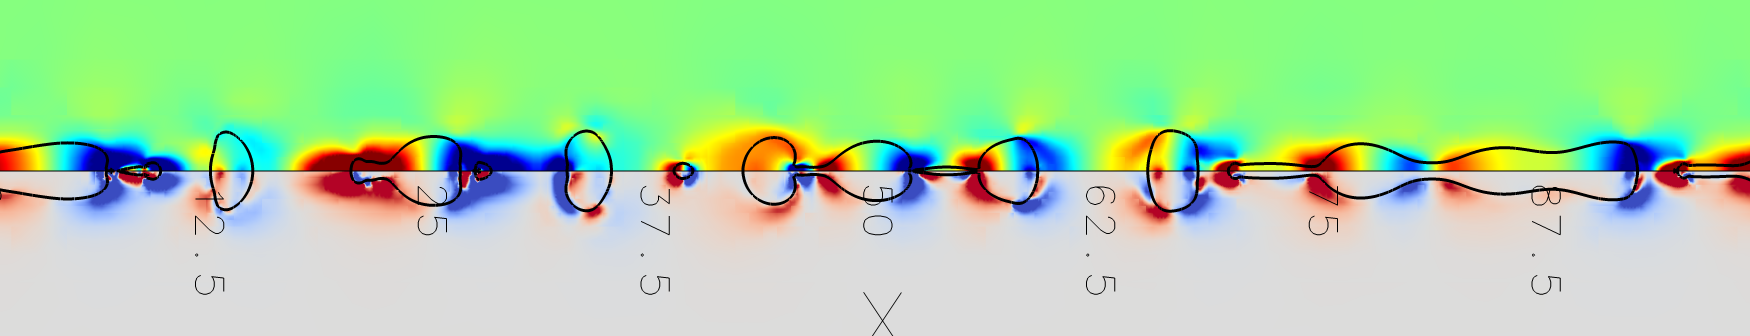

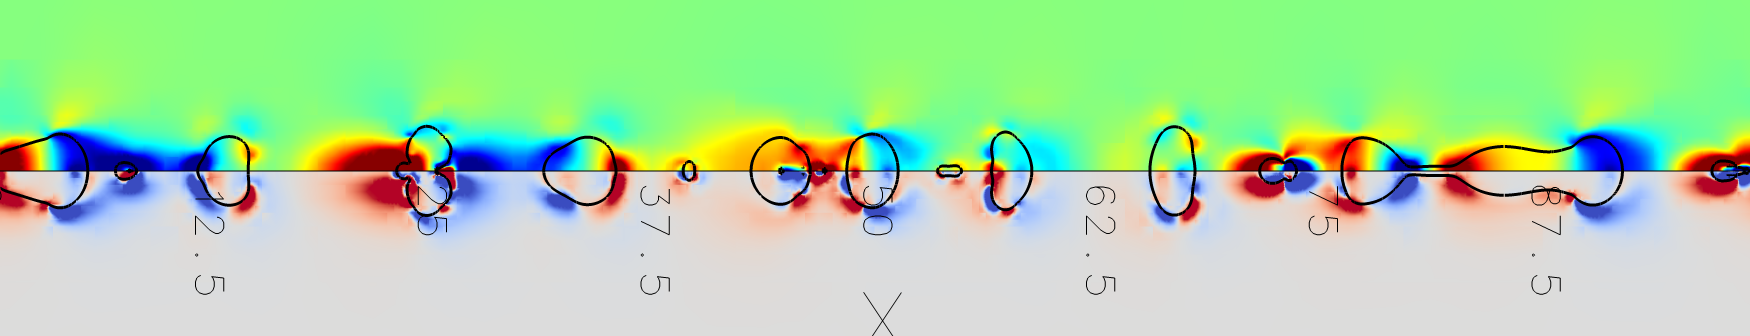

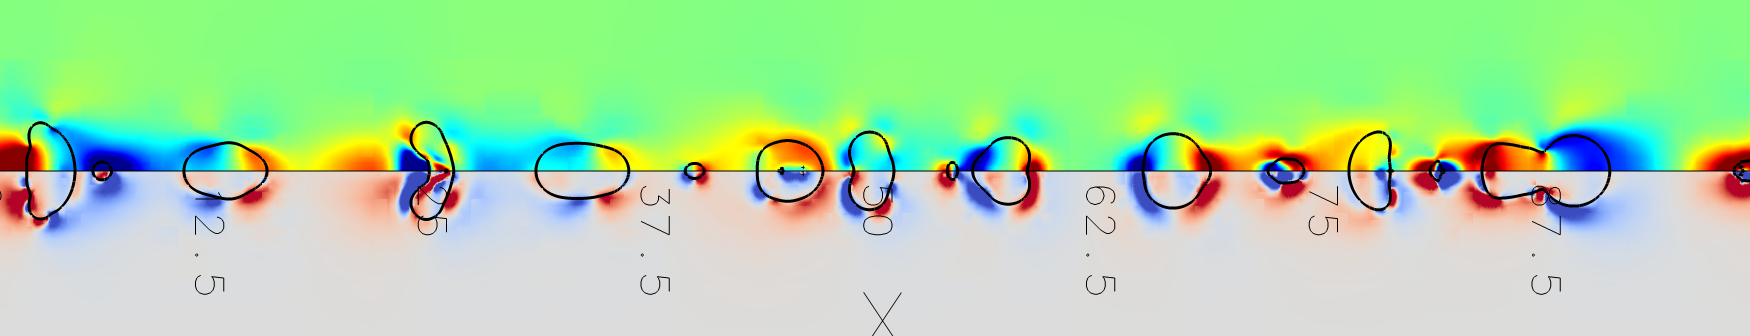

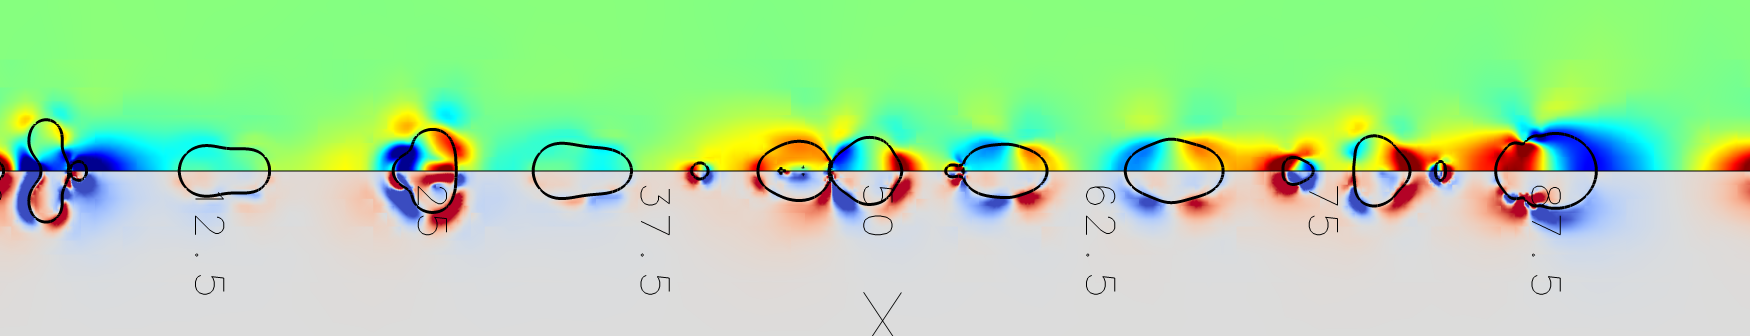

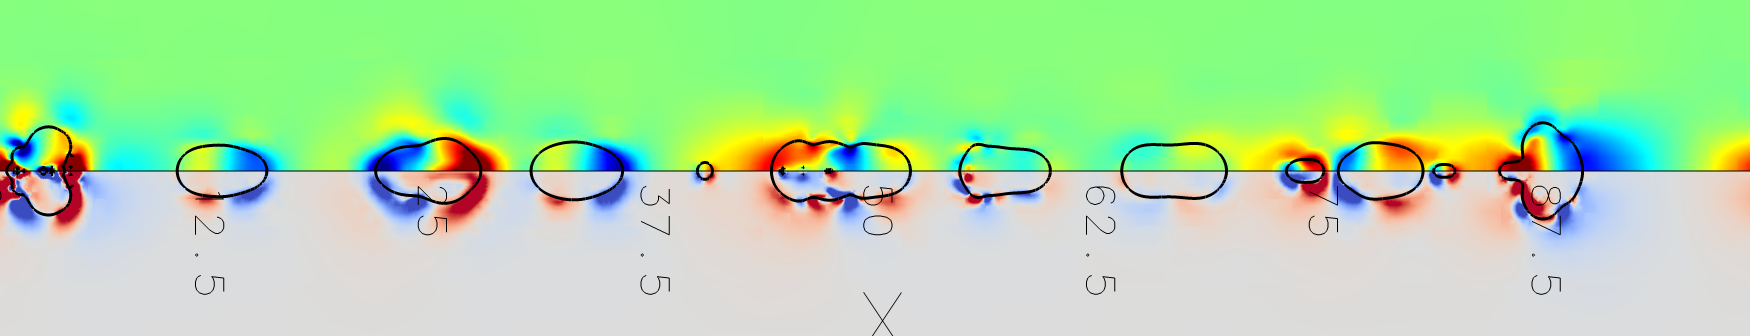

In [9]:
from IPython.display import Image, display

listOfImageNames = ['../d1/img-snapshot-12.png',
                    '../d1/img-snapshot-13.png',
                    '../d1/img-snapshot-14.png',
                    '../d1/img-snapshot-15.png',
                    '../d1/img-snapshot-16.png',]

for imageName in listOfImageNames:
    display(Image(filename=imageName))

### Insights from the temporal evolution of the ligament 
From the above series of images, the 2nd and 3rd images from the top seem to the the most interesting, as it corresponds to the initial instants just after the complete breakup of the ligament. 

#### Number of drops vs. time
Let us look at how the total number of drops vary versus time. This gives us an idea about the point beyond which no more breakups occur, and coalescences dominate the dynamics. 

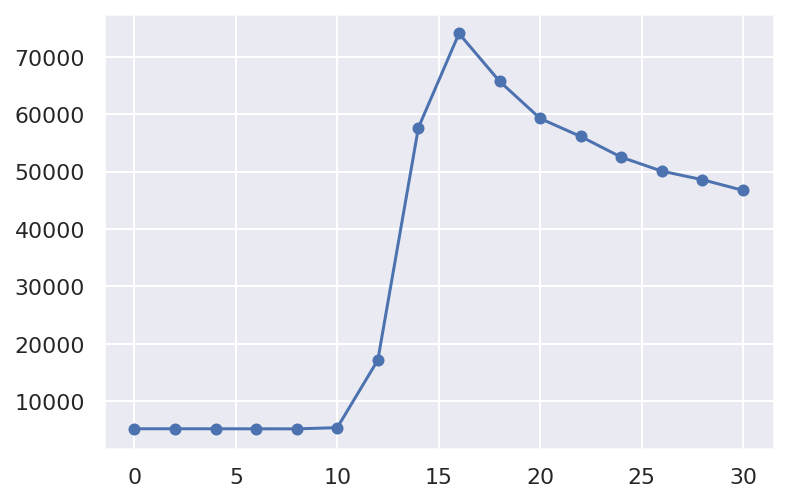

In [10]:
plt.plot(ndrops['time'], ndrops['drops'], marker = 'o', markersize = '5') ; 

Thus, we can clearly see that the beyond T=16, no more breakups occur. 

## Verification of quantization effects


### Equivalent Diameters
Let us compute the values for the **equivalent diameters**, which can be simply estimated by equating the volume under our *discrete* wavelengths ($L_i $) to the volume of a drop with diameter $D_i$. Thus we get 

$$ \pi D_i^3 /6 = \pi R^2 L_i \implies D_i = (6 L_i R^2 )^{1/3} $$ 

The $i$ in the above equation refers to the discrete wave number, whose wavelength is given by $L_i = L/i$. We also rescale the the diameters with the intial width of the ligament $W$, thus giving us 

$$ D_i / W = \left(3\Lambda /2i \right)^{1/3} \,. $$

### Rayleigh-Plateau unstable wavelengths

Now, setting $i=1$, we get the maximum possible equivalent diameter, which is the case if the entire ligament collapsed into a single drop.
The shortest wavelength which is unstable with respect to Rayleigh-Plateau is given by 

$$ i \approx \Lambda/\pi \quad \implies D_\textrm{short}/W \approx 1.68 \,.$$ 

For the optimal (largest growth rate) wavelength of the Rayleigh-Plateau instability, we have 

$$ i \approx 0.7 \Lambda/\pi \quad \implies D_\textrm{rp}/W \approx 1.89 \,.$$ 

> $\Lambda = 50$ for `d1` dataset. 

### Key $D/W$ values
 
Therefore, we have several interesting values for the equivalent diameters as follows 
- $D_\textrm{max}/W \approx 4.21$ : Largest wavelength for the $\Lambda =50$ (entire ligament) .
- $D_\textrm{rp}/W \approx 1.89$ : Wavelength corresponding to optimal growth rate of Rayleigh-Plateau instability.
- $D_\textrm{short}/ W \approx 1.68$ : Shortest unstable wavelength for Rayleigh-Plateau instability.
- $D_\textrm{cut}/W \approx 1.14 $: Cut-off wavelengths set by low-pass filter for the $\Lambda =50$.


We also have to take into account the size of drops that form after a coalescence event. We assign the important values of $D/W$ computed above to some variables, and also define a function that computes the diameter of a drop formed due to coalescence of two drops. 

## Drop size distributions

We take a look at the drop size PDF at T=16. 

### Linear scale histogram

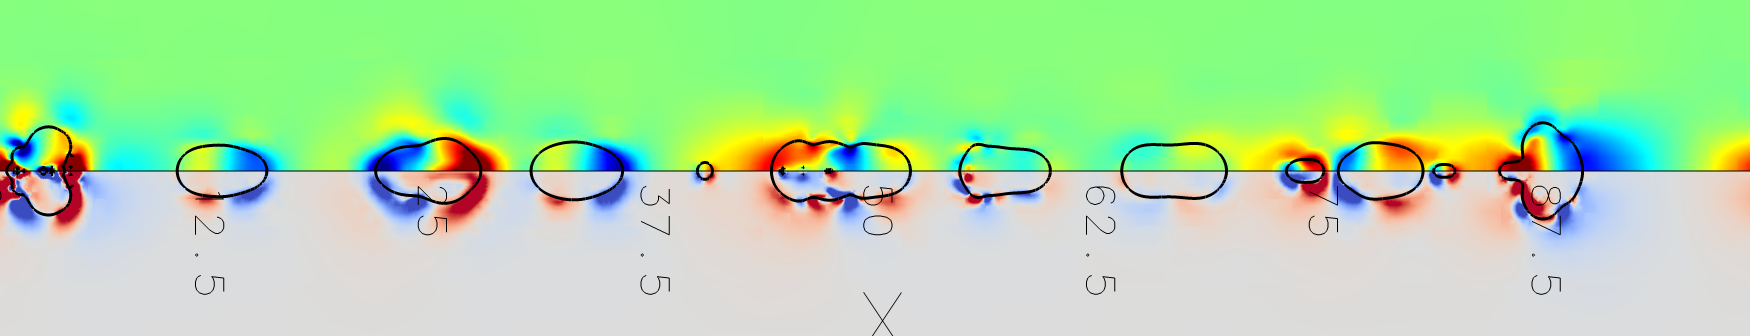

3.77872


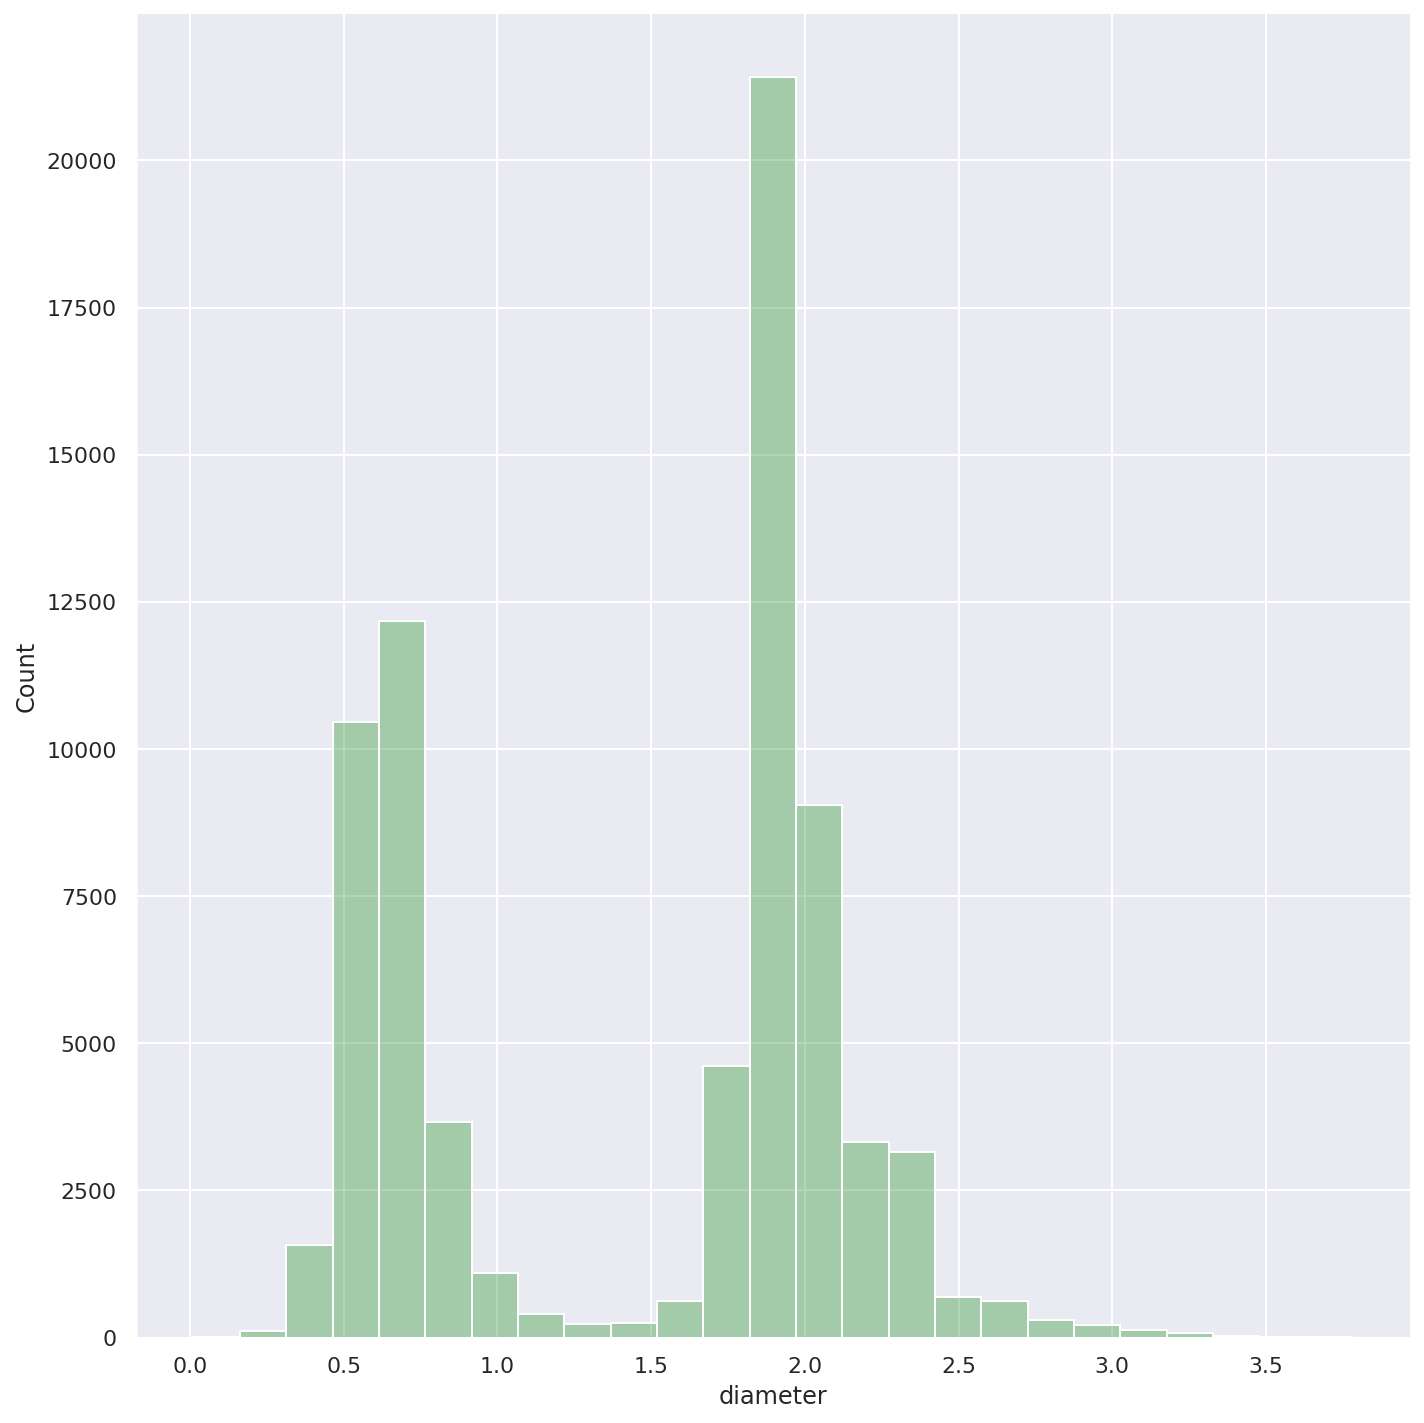

In [20]:
display(Image(filename="../d1/img-snapshot-16p.png"))

time_slice = 16
bins = 25

print(np.amax(data.diameter[(data.time == time_slice)].map(lambda p: p/2.0)))

sns.displot(data=data.diameter[(data.time == time_slice)].map(lambda p: p/2.0), kind="hist", kde=False,
            legend=True, palette="bright", height=10.0, aspect=1.0,
           alpha = 0.3 , color = 'green', bins = bins) ;

In [11]:
#initializing values for analysis of d1,d3 datasets

d_max = 4.21 
d_rp = 1.89
d_sh = 1.68
d_cut = 1.14 
d_coalesce = d_rp*(2.0**(1.0/3.0))

# creating a function that computes D/W for coalescing drops (based on RP optimal)
# inputs : base (e.g. rp diameter), fractions of base d1,d2
def d_coalesce(base,d1,d2):
    factor = (d1+d2)**(1.0/3.0)
    return base*factor

### Linear scale plots

Now we plot the histogram for dataset `d1` at $T=18$. 

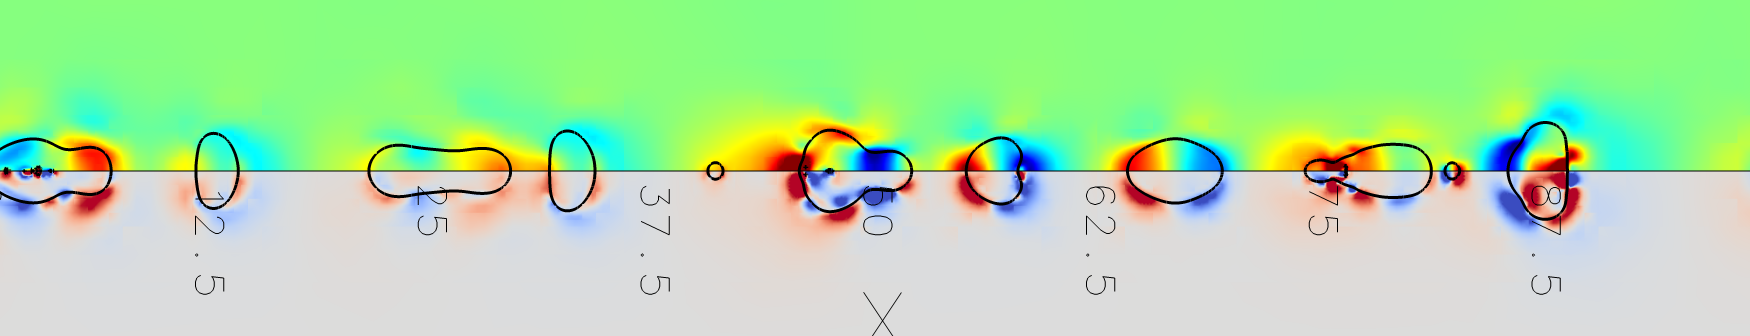

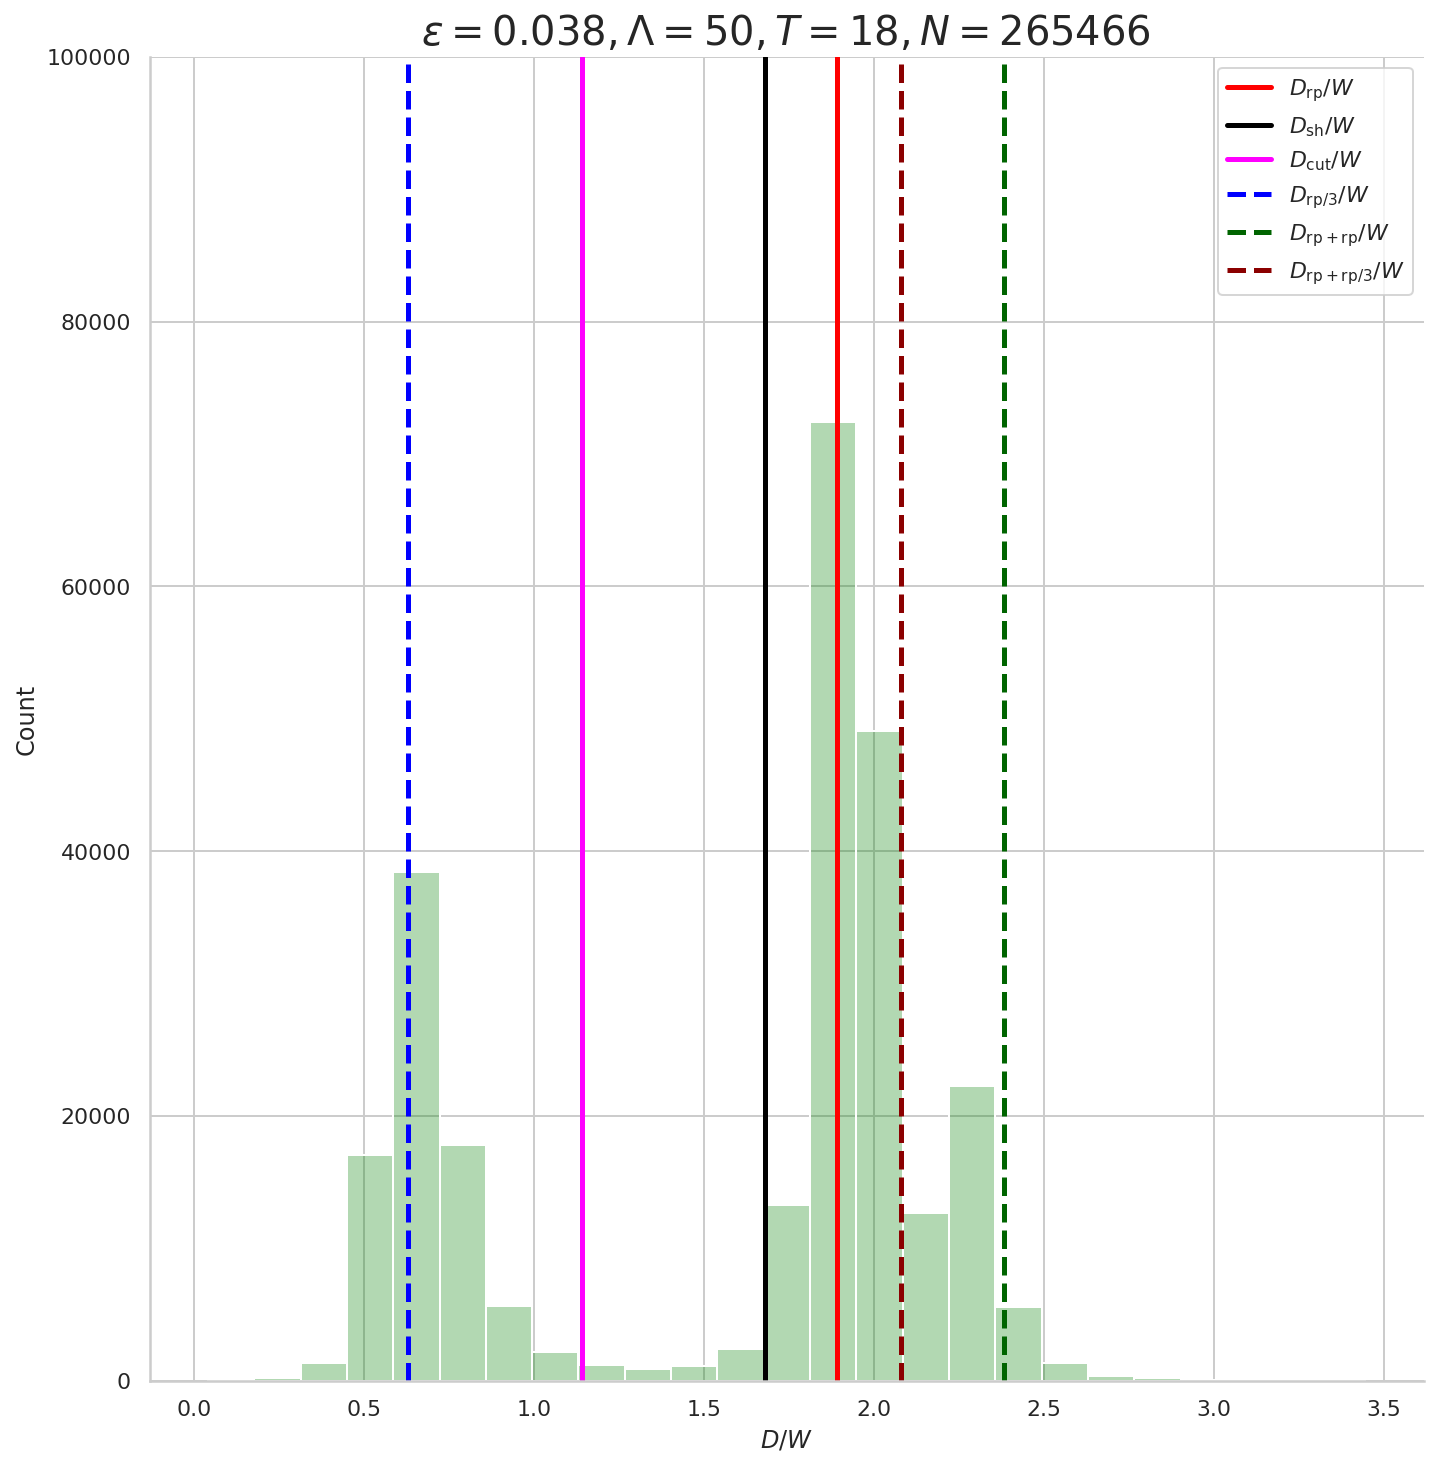

In [19]:
# histogram for d1

display(Image(filename="../d1/img-snapshot-18.png"))

time = 18
bins = 25

sns.displot(data=d1_new.diameter[(d1_new.time == time)].map(lambda p: p/2.0), kind="hist", kde=False,
            legend=True, palette="bright", height=10.0, aspect=1.0,
           alpha = 0.3 , color = 'green', bins = bins) ;

# plotting the vertical lines for d_max, d_rp, d_sh, d_cut 

#plt.axvline(x = d_max, label = r'$D_{\rm{max}}$', color='darkgreen',lw=2.5);
plt.axvline(x = d_rp, label = r'$D_{\rm{rp}}/W$', color='red', lw=2.5);
plt.axvline(x = d_sh, label = r'$D_{\rm{sh}}/W$', color='black', lw=2.5);
plt.axvline(x = d_cut, label = r'$D_{\rm{cut}}/W$', color='magenta', lw=2.5);
plt.axvline(x = d_rp/3.0, label = r'$D_{\rm{rp}/3}/W$', color='blue', lw=2.5, linestyle='--');
#plt.xlim(right = 5.0);
plt.axvline(x = d_coalesce(d_rp,1.0,1.0), label = r'$D_{\rm{rp}+\rm{rp}}/W$', color='darkgreen', lw=2.5, linestyle='--');
plt.axvline(x = d_coalesce(d_rp,1.0,0.33), label = r'$D_{\rm{rp}+\rm{rp}/3}/W$', color='darkred', lw=2.5, linestyle='--');
plt.title(r'$\varepsilon = 0.038, \Lambda = 50 , T=%d, N=%d$ ' %(time,d1_new.diameter[d1_new.time == time].shape[0]), fontsize=20);
plt.ylim(top=100000);
plt.xlabel(r'$D/W$')
plt.legend();


Generating the plot for dataset `d3`, which corresponds to stronger initial perturbation. 

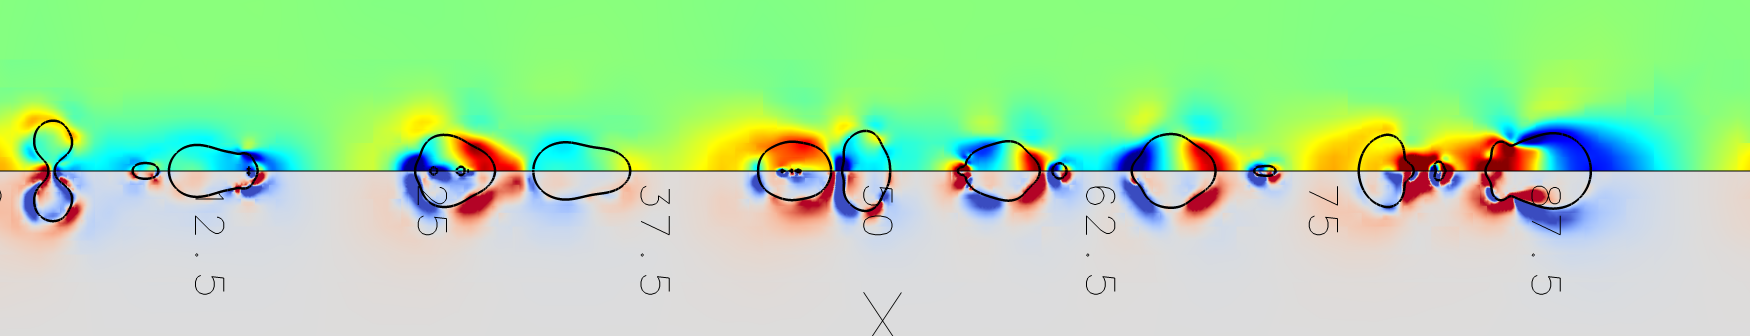

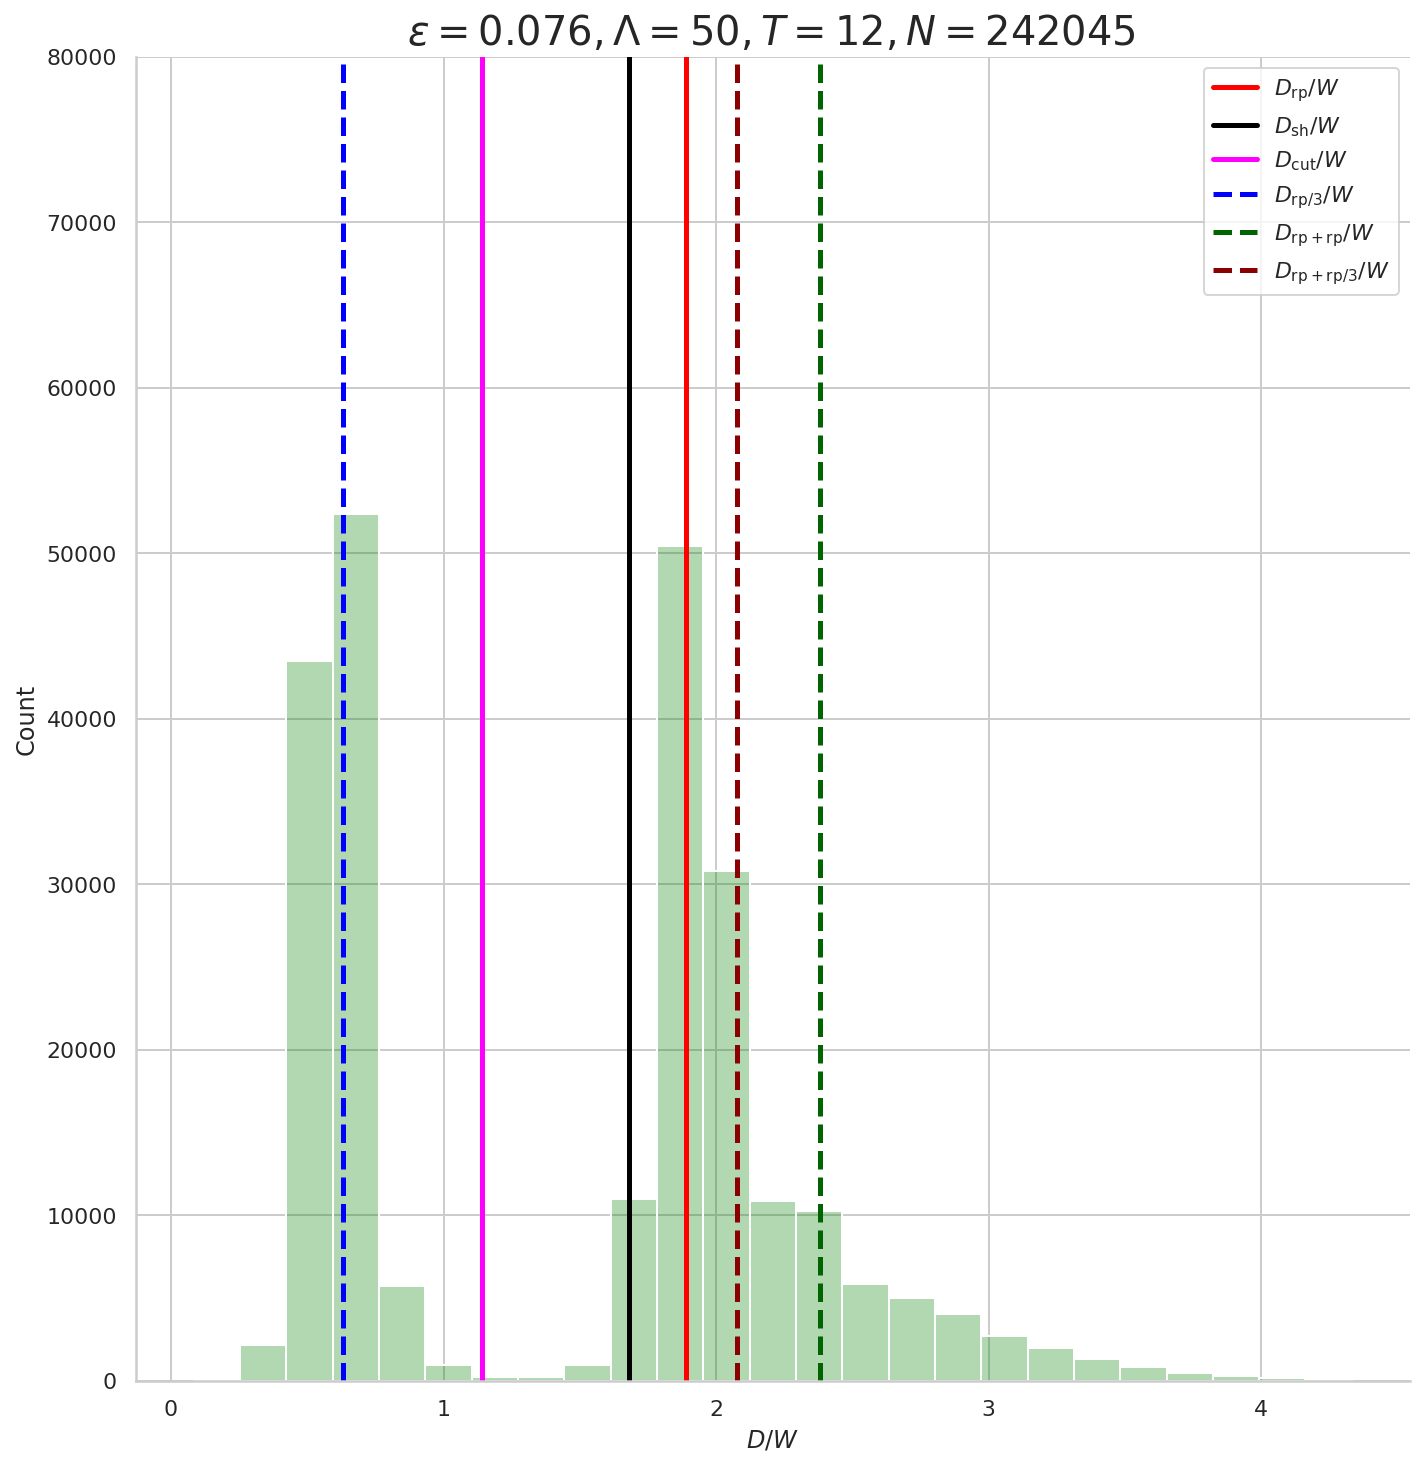

In [14]:
# histogram for d3

display(Image(filename="../d3/img-snapshot-12.png"))

time = 12
bins = 25

sns.displot(data=d3_new.diameter[(d3_new.time == time)].map(lambda p: p/2.0), kind="hist", kde=False,
            legend=True, palette="bright", height=10.0, aspect=1.0,
           alpha = 0.3 , color = 'green', bins = bins) ;

# plotting the vertical lines for d_max, d_rp, d_sh, d_cut 

#plt.axvline(x = d_max, label = r'$D_{\rm{max}}$', color='darkgreen',lw=2.5);
plt.axvline(x = d_rp, label = r'$D_{\rm{rp}}/W$', color='red', lw=2.5);
plt.axvline(x = d_sh, label = r'$D_{\rm{sh}}/W$', color='black', lw=2.5);
plt.axvline(x = d_cut, label = r'$D_{\rm{cut}}/W$', color='magenta', lw=2.5);
plt.axvline(x = d_rp/3.0, label = r'$D_{\rm{rp}/3}/W$', color='blue', lw=2.5, linestyle='--');
#plt.xlim(right = 5.0);
plt.axvline(x = d_coalesce(d_rp,1.0,1.0), label = r'$D_{\rm{rp}+\rm{rp}}/W$', color='darkgreen', lw=2.5, linestyle='--');
plt.axvline(x = d_coalesce(d_rp,1.0,0.33), label = r'$D_{\rm{rp}+\rm{rp}/3}/W$', color='darkred', lw=2.5, linestyle='--');
plt.title(r'$\varepsilon = 0.076, \Lambda = 50 , T=%d, N=%d$ ' %(time,d3_new.diameter[d3_new.time == time].shape[0]), fontsize=20);
plt.ylim(top=80000);
plt.xlabel(r'$D/W$')
plt.legend();


### Log ordinate plots

We first create a function that computes all the equivalent diameters corresponding to all the discrete wavelenghts perturbed. 

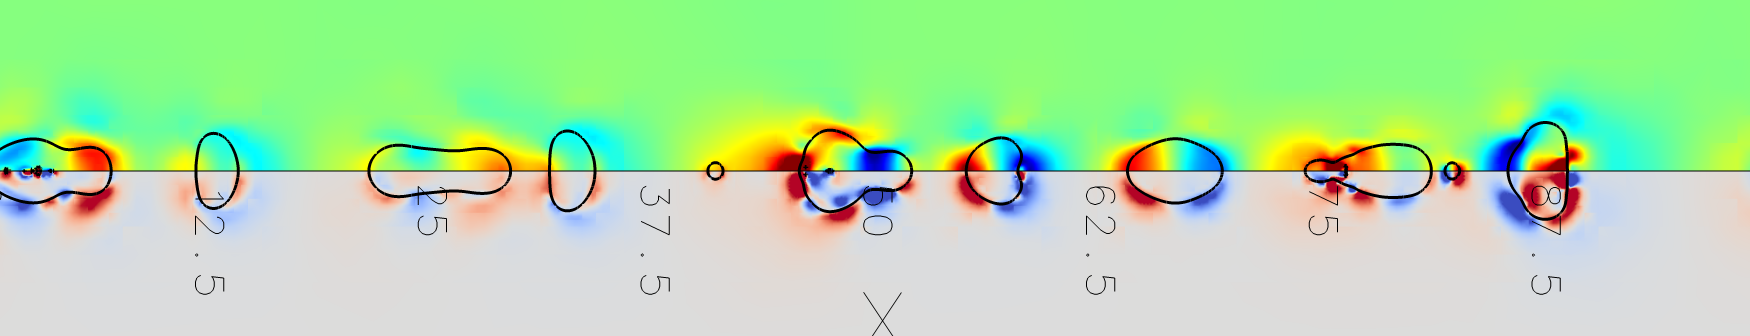

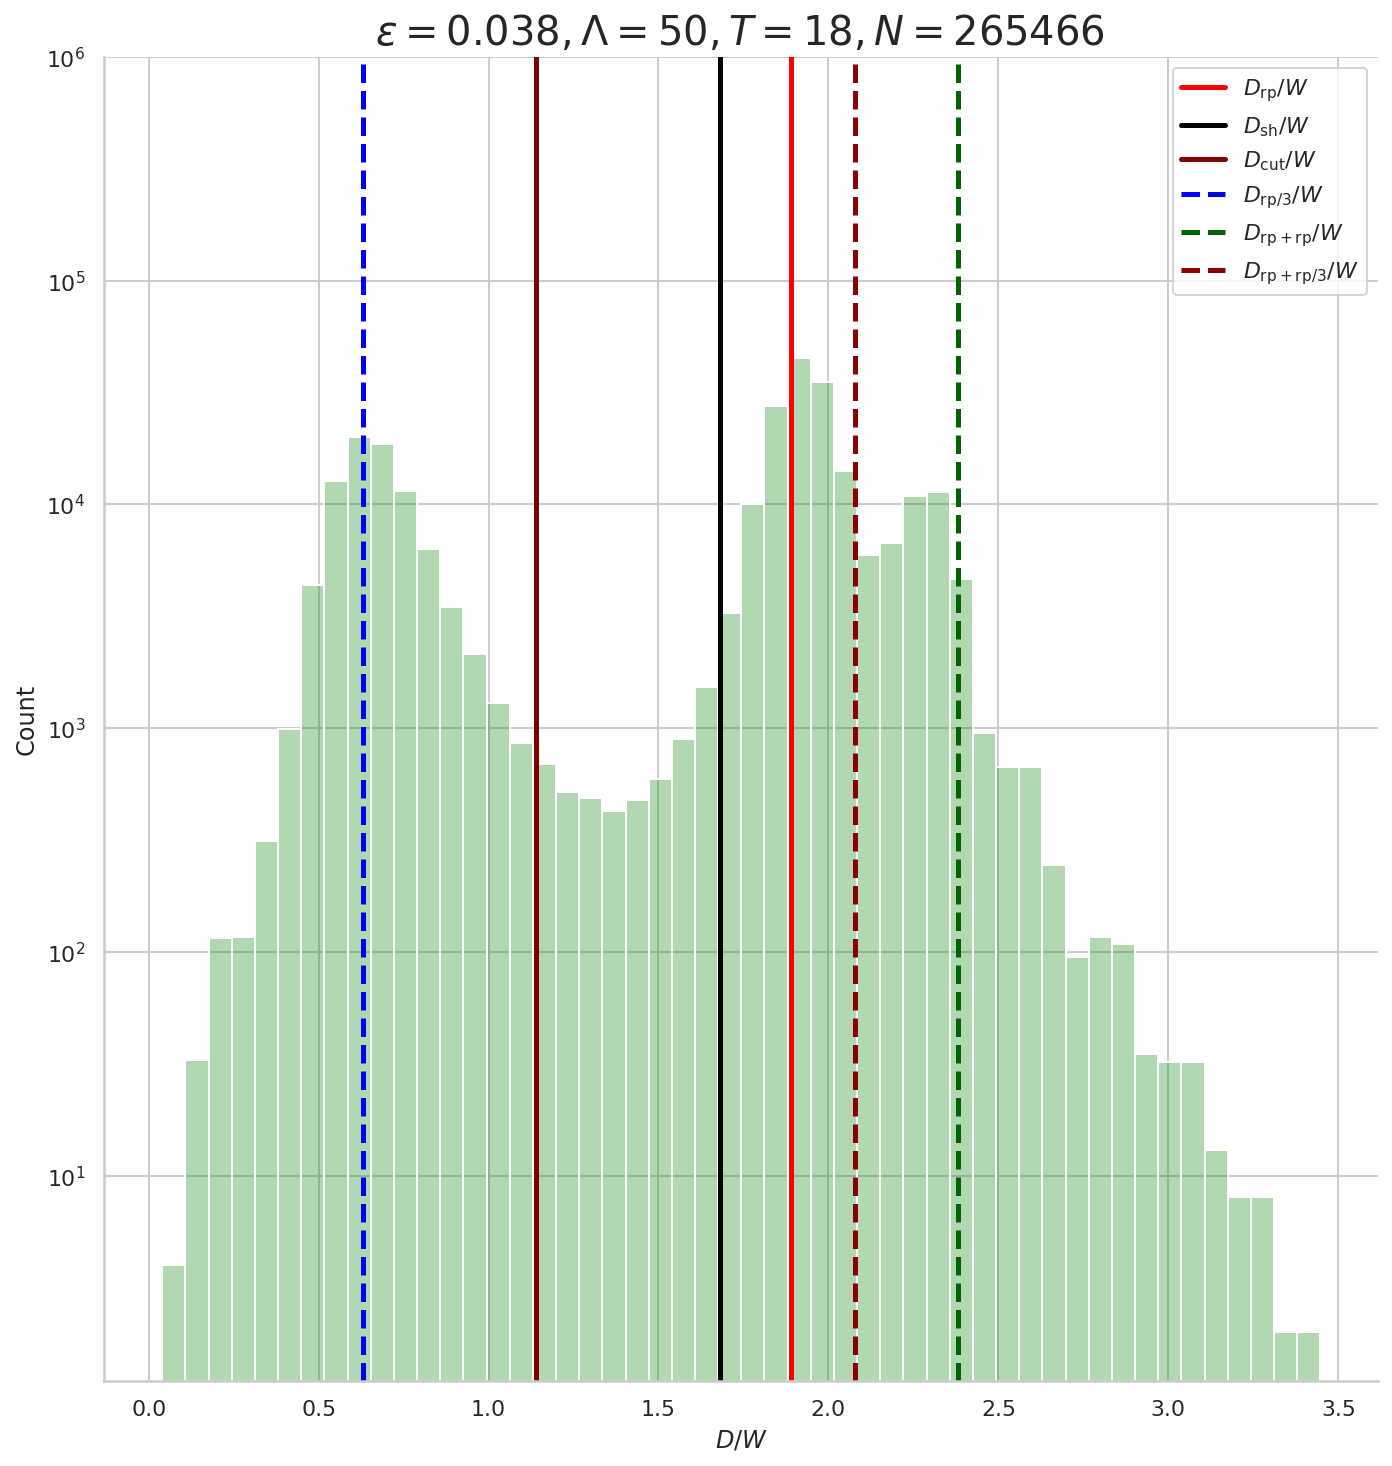

In [15]:
# Dataset d1

display(Image(filename="../d1/img-snapshot-18.png"))

# Select time slice 
time = 18

# Set the number of bins
n_bins = 50

sns.displot(data=d1_new.diameter[(d1_new.time == time)].map(lambda p: p/2.0), kind="hist", kde=False,
            legend=True, palette="bright", height=10.0, aspect=1.0,
           alpha = 0.3 , color = 'green', bins=n_bins) ;
  
#plt.axvline(x = d_max_1, label = r'$D_{\rm{max}}$', color='darkgreen',lw=2.5);
plt.axvline(x = d_rp, label = r'$D_{\rm{rp}}/W$', color='red', lw=2.5);
plt.axvline(x = d_sh, label = r'$D_{\rm{sh}}/W$', color='black', lw=2.5);
plt.axvline(x = d_cut, label = r'$D_{\rm{cut}}/W$', color='maroon', lw=2.5);
plt.axvline(x = d_rp/3.0, label = r'$D_{\rm{rp}/3}/W$', color='blue', lw=2.5, linestyle='--');
plt.axvline(x = d_coalesce(d_rp,1.0,1.0), label = r'$D_{\rm{rp}+\rm{rp}}/W$', color='darkgreen', lw=2.5, linestyle='--');
plt.axvline(x = d_coalesce(d_rp,1.0,0.33), label = r'$D_{\rm{rp}+\rm{rp}/3}/W$', color='darkred', lw=2.5, linestyle='--');
plt.title(r'$\varepsilon = 0.038, \Lambda = 50 , T=%d, N=%d$ ' %(time,d1_new.diameter[d1_new.time == time].shape[0]), fontsize=20);
plt.legend(loc='best');
plt.yscale("log");
plt.ylim(top=1e6);
#plt.xlim(right = 5.0);
plt.xlabel(r'$D/W$');

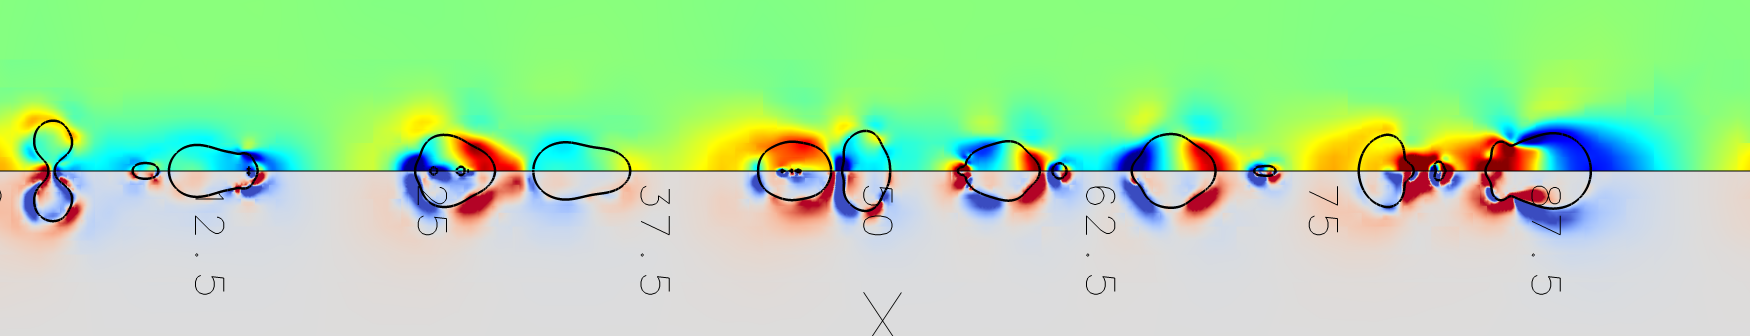

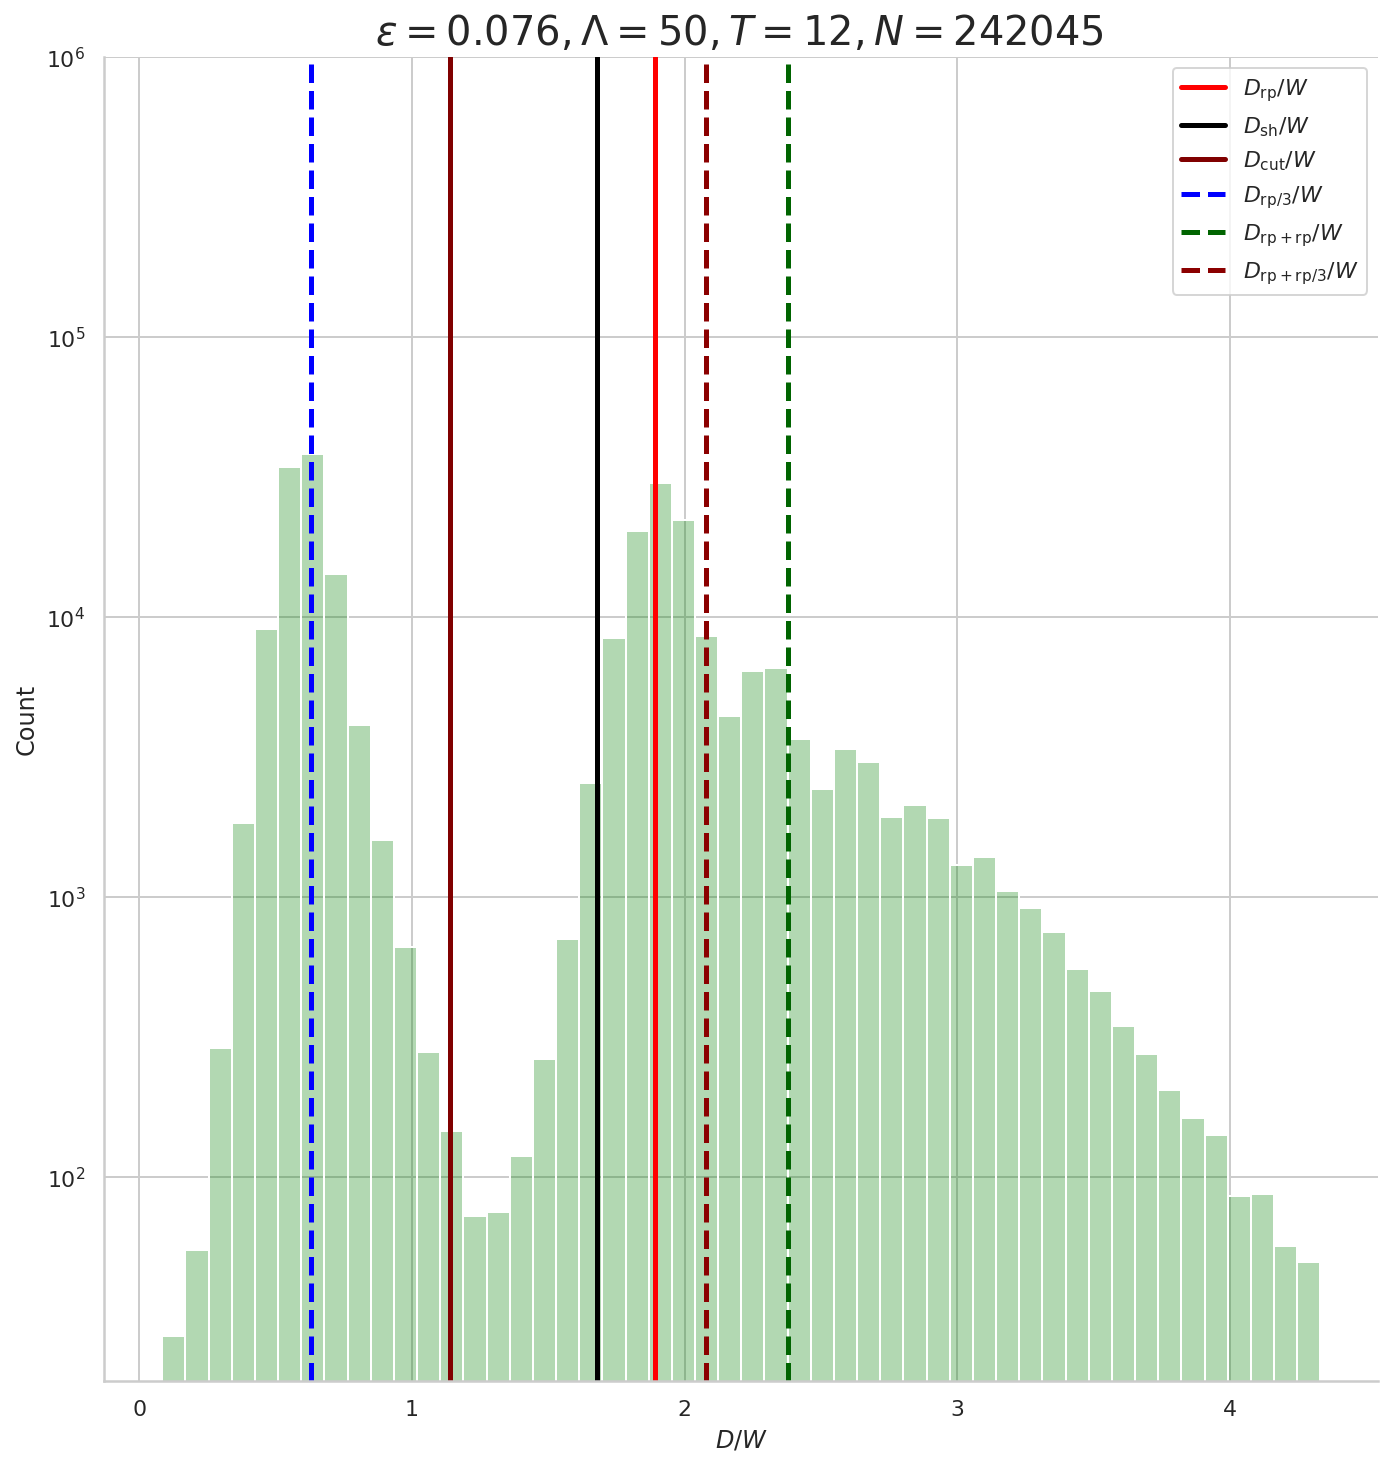

In [16]:
# Dataset d3

display(Image(filename="../d3/img-snapshot-12.png"))

# Select time slice 
time = 12

# Set the number of bins
n_bins = 50

sns.displot(data=d3_new.diameter[(d3_new.time == time)].map(lambda p: p/2.0), kind="hist", kde=False,
            legend=True, palette="bright", height=10.0, aspect=1.0,
           alpha = 0.3 , color = 'green', bins=n_bins) ;
  
#plt.axvline(x = d_max_1, label = r'$D_{\rm{max}}$', color='darkgreen',lw=2.5);
plt.axvline(x = d_rp, label = r'$D_{\rm{rp}}/W$', color='red', lw=2.5);
plt.axvline(x = d_sh, label = r'$D_{\rm{sh}}/W$', color='black', lw=2.5);
plt.axvline(x = d_cut, label = r'$D_{\rm{cut}}/W$', color='maroon', lw=2.5);
plt.axvline(x = d_rp/3.0, label = r'$D_{\rm{rp}/3}/W$', color='blue', lw=2.5, linestyle='--');
plt.axvline(x = d_coalesce(d_rp,1.0,1.0), label = r'$D_{\rm{rp}+\rm{rp}}/W$', color='darkgreen', lw=2.5, linestyle='--');
plt.axvline(x = d_coalesce(d_rp,1.0,0.33), label = r'$D_{\rm{rp}+\rm{rp}/3}/W$', color='darkred', lw=2.5, linestyle='--');
plt.title(r'$\varepsilon = 0.076, \Lambda = 50 , T=%d, N=%d$ ' %(time,d3_new.diameter[d3_new.time == time].shape[0]), fontsize=20);
plt.legend(loc='best');
plt.yscale("log");
plt.ylim(top=1e6);
#plt.xlim(right = 5.0);
plt.xlabel(r'$D/W$');

## Key Findings 

- Two types of *main peaks* are observed in the distribution corresponding to -  
 1. Linear growth (exponential) of the **Rayleigh-Plateau** optimal wavelength ($D/W \sim 1.89$).
 2. Non-linear effects leading to **satellite** drops, which are roughly smaller (volume or mass) by a factor of 10 ($D/W \sim 0.62$).  



- The secondary peaks seem to arise due to the **coalescence of different combinations** of the two *primary* drop sizes.  